# Feature Engineering Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations

# For better visualization in the notebook
%matplotlib inline

### Loading the Original Raw Dataset

In [2]:
# Load the dataset
df = pd.read_excel('../Track1_Data/raw/mental_health_dataset.xlsx')

# Display the first few rows
print("First few rows of the dataset:")
display(df.head())

# Get basic information about the dataset
print("\nDataset Info:")
display(df.info())

First few rows of the dataset:


,age,sex,hospital_center_id,condition,condition_type,bdi_ii_baseline,bdi_ii_after_intervention_12w,bdi_ii_follow_up_24w,mindfulness_therapies_started,mindfulness_therapies_completed
0,78.0,female,1,Cancer,Breast,10.0,3.0,7.0,14,13
1,70.0,female,1,Cancer,Breast,4.0,4.0,8.0,14,12
2,75.0,female,1,Cancer,Breast,18.0,10.0,13.0,4,4
3,73.0,female,1,Cancer,Breast,11.0,NaN,NaN,0,0
4,62.0,female,1,Cancer,Breast,5.0,11.0,20.0,12,7



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              209 non-null    float64
 1   sex                              210 non-null    object 
 2   hospital_center_id               210 non-null    int64  
 3   condition                        210 non-null    object 
 4   condition_type                   209 non-null    object 
 5   bdi_ii_baseline                  209 non-null    float64
 6   bdi_ii_after_intervention_12w    167 non-null    float64
 7   bdi_ii_follow_up_24w             166 non-null    float64
 8   mindfulness_therapies_started    210 non-null    int64  
 9   mindfulness_therapies_completed  210 non-null    int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 16.5+ KB


None

### Splitting into Train and Test based on the 12 and 24 week outcome

The dividing of the dataset into the train and test will be based on the values of the `bdi_ii_after_intervention_12w`, `bdi_ii_follow_up_24w` columns. If the both columns are NULL then the row is added to the test dataframe and all other rows are added to the train dataframe. This is the main logic we will be using to split the dataset.

In [4]:
from pathlib import Path

# Rows where both follow-up columns are NaN go to test, the rest to train
mask_test = df['bdi_ii_after_intervention_12w'].isna() & df['bdi_ii_follow_up_24w'].isna()

test_df = df[mask_test].copy().reset_index(drop=True)
train_df = df[~mask_test].copy().reset_index(drop=True)

print(f"Total rows: {len(df)} | Train: {len(train_df)} | Test: {len(test_df)}")

# Save splits (creates directory if necessary)
out_dir = Path('../Track1_Data/processed')
out_dir.mkdir(parents=True, exist_ok=True)
train_df.to_excel(out_dir / 'train_split.xlsx', index=False)
test_df.to_excel(out_dir / 'test_split.xlsx', index=False)

# Quick preview
print("\nTrain sample:")
display(train_df.head())
print("\nTest sample:")
display(test_df.head())

Total rows: 210 | Train: 167 | Test: 43

Train sample:


,age,sex,hospital_center_id,condition,condition_type,bdi_ii_baseline,bdi_ii_after_intervention_12w,bdi_ii_follow_up_24w,mindfulness_therapies_started,mindfulness_therapies_completed
0,78.0,female,1,Cancer,Breast,10.0,3.0,7.0,14,13
1,70.0,female,1,Cancer,Breast,4.0,4.0,8.0,14,12
2,75.0,female,1,Cancer,Breast,18.0,10.0,13.0,4,4
3,62.0,female,1,Cancer,Breast,5.0,11.0,20.0,12,7
4,53.0,female,1,Cancer,Breast,13.0,8.0,9.0,0,0



Test sample:


,age,sex,hospital_center_id,condition,condition_type,bdi_ii_baseline,bdi_ii_after_intervention_12w,bdi_ii_follow_up_24w,mindfulness_therapies_started,mindfulness_therapies_completed
0,73.0,female,1,Cancer,Breast,11.0,NaN,NaN,0,0
1,67.0,female,1,Cancer,Breast,25.0,NaN,NaN,5,1
2,73.0,female,1,Cancer,Breast,24.0,NaN,NaN,23,14
3,79.0,female,1,Cancer,Breast,10.0,NaN,NaN,0,0
4,80.0,female,1,Cancer,Breast,24.0,NaN,NaN,0,0


### Analysis of the train and test dataframe

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              167 non-null    float64
 1   sex                              167 non-null    object 
 2   hospital_center_id               167 non-null    int64  
 3   condition                        167 non-null    object 
 4   condition_type                   167 non-null    object 
 5   bdi_ii_baseline                  167 non-null    float64
 6   bdi_ii_after_intervention_12w    167 non-null    float64
 7   bdi_ii_follow_up_24w             166 non-null    float64
 8   mindfulness_therapies_started    167 non-null    int64  
 9   mindfulness_therapies_completed  167 non-null    int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 13.2+ KB


The train datasets has all the data with no null values and perfect data, this type of pure dataset would be very beneficial to train the model

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              42 non-null     float64
 1   sex                              43 non-null     object 
 2   hospital_center_id               43 non-null     int64  
 3   condition                        43 non-null     object 
 4   condition_type                   42 non-null     object 
 5   bdi_ii_baseline                  42 non-null     float64
 6   bdi_ii_after_intervention_12w    0 non-null      float64
 7   bdi_ii_follow_up_24w             0 non-null      float64
 8   mindfulness_therapies_started    43 non-null     int64  
 9   mindfulness_therapies_completed  43 non-null     int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 3.5+ KB


We are able to see that there are 3 columns which has one null value, those columns are `age` which has null value in the 28th index row, `bdi_ii_baseline` which has null value in the 37th index row and also `condition_type` which is the 25th index row.

In [7]:
test_df[test_df['age'].isna()]

,age,sex,hospital_center_id,condition,condition_type,bdi_ii_baseline,bdi_ii_after_intervention_12w,bdi_ii_follow_up_24w,mindfulness_therapies_started,mindfulness_therapies_completed
28,NaN,female,3,Lower-limb amputation,No prosthesis,12.0,NaN,NaN,0,0


In [11]:
test_df[test_df['bdi_ii_baseline'].isna()]

,age,sex,hospital_center_id,condition,condition_type,bdi_ii_baseline,bdi_ii_after_intervention_12w,bdi_ii_follow_up_24w,mindfulness_therapies_started,mindfulness_therapies_completed
37,45.0,male,3,Acute coronary syndrome,Revascularization,NaN,NaN,NaN,5,3


In [9]:
test_df[test_df['condition_type'].isna()]

,age,sex,hospital_center_id,condition,condition_type,bdi_ii_baseline,bdi_ii_after_intervention_12w,bdi_ii_follow_up_24w,mindfulness_therapies_started,mindfulness_therapies_completed
25,86.0,male,2,Renal insufficiency,NaN,7.0,NaN,NaN,4,0


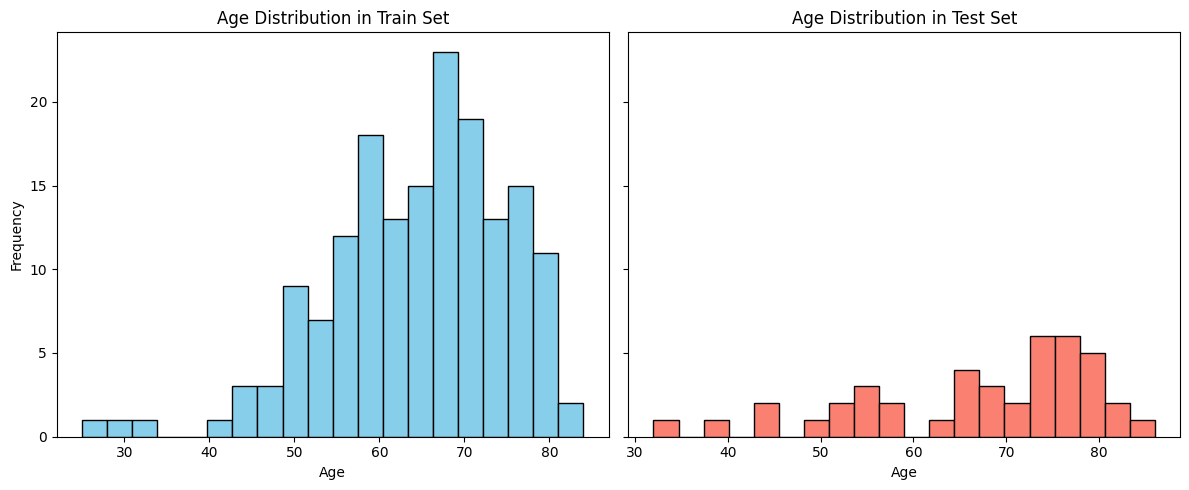

In [14]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

plt.sca(axes[0])
plt.hist(train_df['age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution in Train Set')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.sca(axes[1])
plt.hist(test_df['age'].dropna(), bins=20, color='salmon', edgecolor='black')
plt.title('Age Distribution in Test Set')
plt.xlabel('Age')

plt.tight_layout()
plt.show()


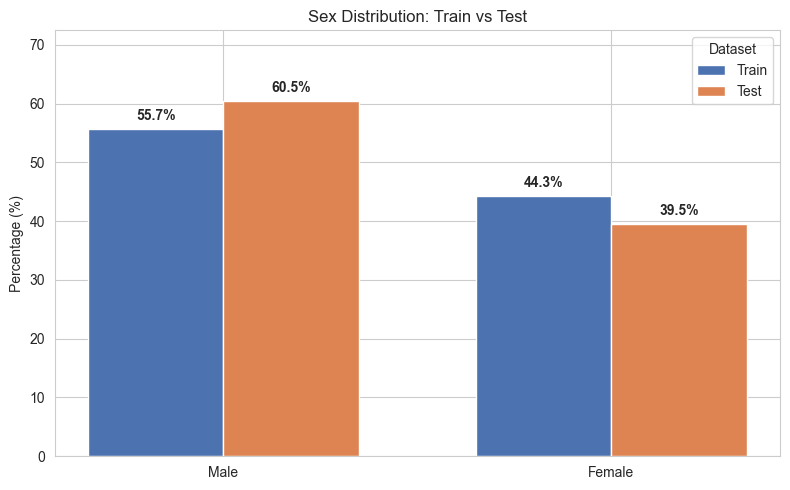

In [16]:
import numpy as np
import seaborn as sns

# Compare sex distribution between train and test in a single grouped bar plot

sns.set_style('whitegrid')

# categories in a consistent order
categories = ['male', 'female']

# counts and percentages
train_counts = train_df['sex'].value_counts().reindex(categories).fillna(0)
test_counts = test_df['sex'].value_counts().reindex(categories).fillna(0)

train_perc = (train_counts / train_counts.sum()) * 100
test_perc = (test_counts / test_counts.sum()) * 100

x = np.arange(len(categories))
width = 0.35

fig2, ax = plt.subplots(figsize=(8, 5))
colors = ['#4c72b0', '#dd8452']  # consistent, readable colors

bars_train = ax.bar(x - width/2, train_perc, width, label='Train', color=colors[0])
bars_test = ax.bar(x + width/2, test_perc, width, label='Test', color=colors[1])

# annotate percentages on top of the bars
for bar in bars_train + bars_test:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        h + 1.0,  # slight offset above the bar
        f"{h:.1f}%",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='semibold'
    )

ax.set_xticks(x)
ax.set_xticklabels([c.capitalize() for c in categories])
ax.set_ylabel('Percentage (%)')
ax.set_title('Sex Distribution: Train vs Test')
ax.legend(title='Dataset')
ax.set_ylim(0, max(train_perc.max(), test_perc.max()) + 12)

plt.tight_layout()
plt.show()

### Each Hospital based BDI Analysis

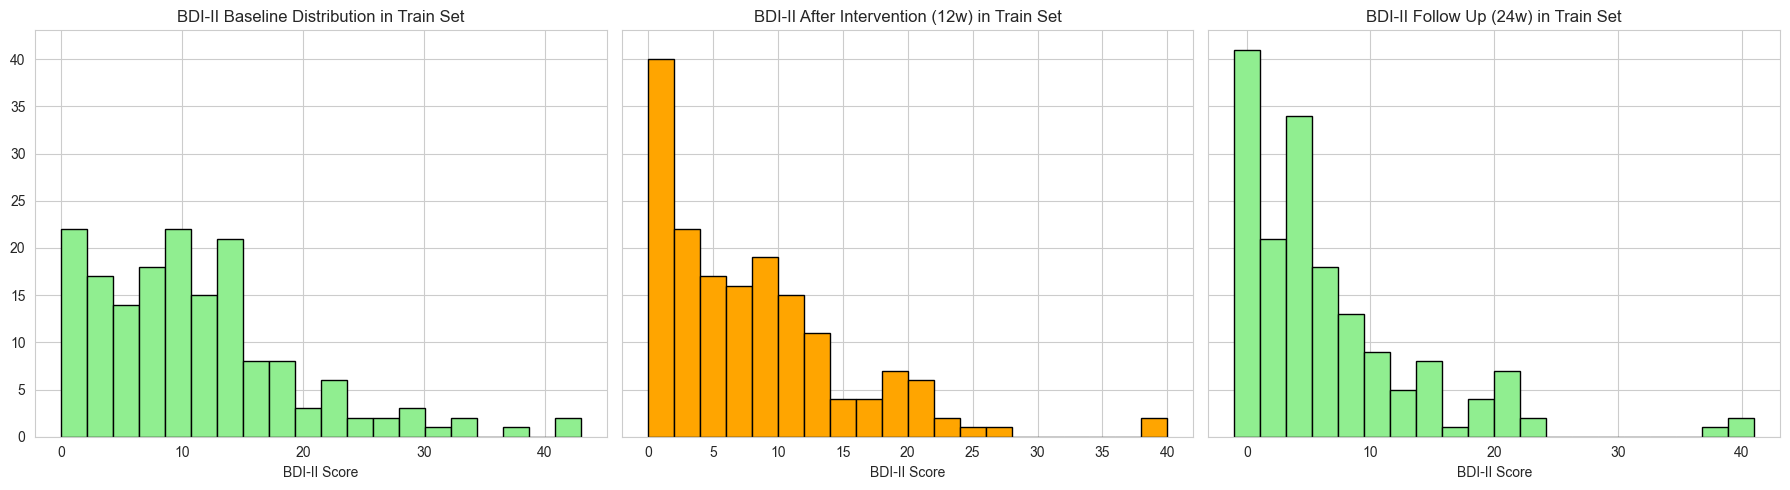

In [28]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

plt.sca(axes[0])
plt.hist(train_df['bdi_ii_baseline'].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.title('BDI-II Baseline Distribution in Train Set')
plt.xlabel('BDI-II Score')

plt.sca(axes[1])
plt.hist(train_df['bdi_ii_after_intervention_12w'].dropna(), bins=20, color='orange', edgecolor='black')
plt.title('BDI-II After Intervention (12w) in Train Set')
plt.xlabel('BDI-II Score')

plt.sca(axes[2])
plt.hist(train_df['bdi_ii_follow_up_24w'].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.title('BDI-II Follow Up (24w) in Train Set')
plt.xlabel('BDI-II Score')

plt.tight_layout()
plt.show()


In [33]:
train_df['hospital_center_id'].value_counts()

hospital_center_id
1    121
3     39
2      7
Name: count, dtype: int64

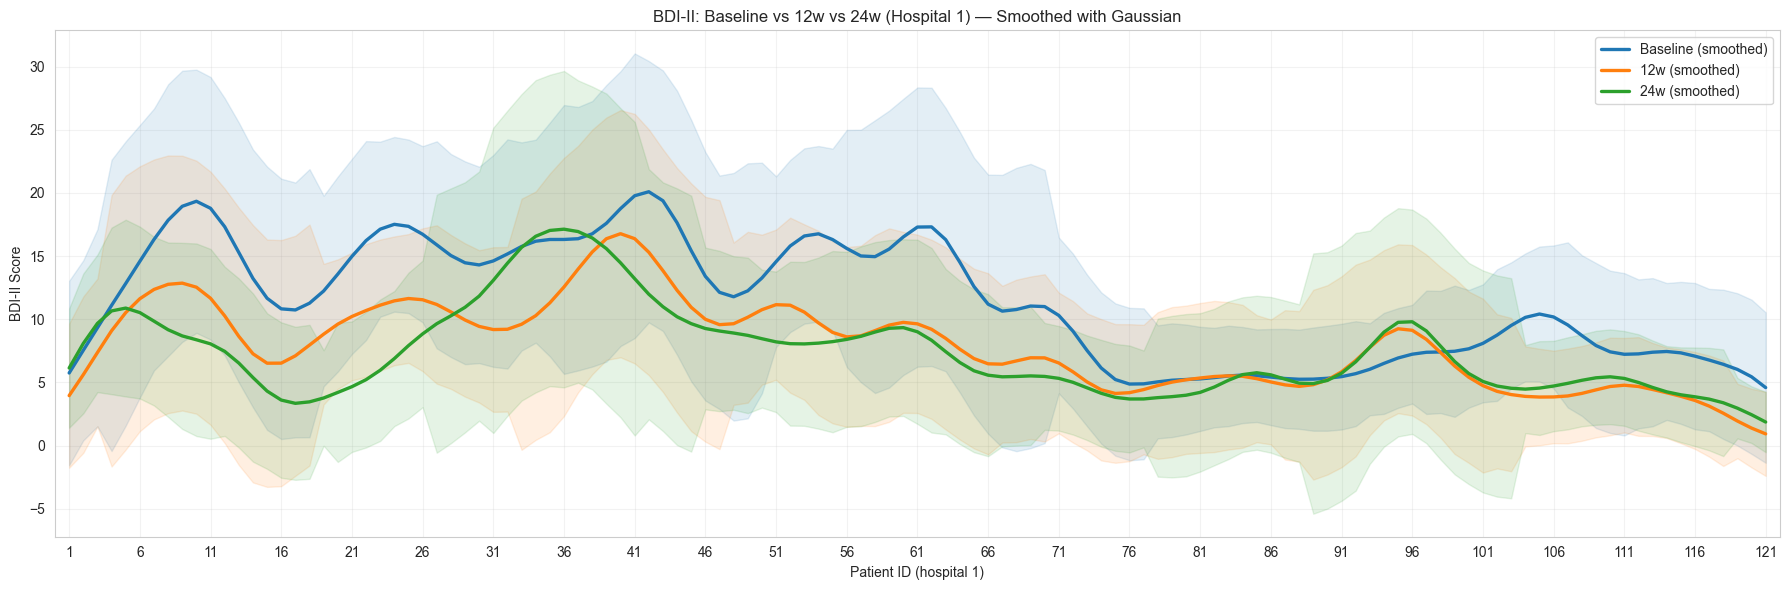

In [67]:
# Smooth lines with a Gaussian kernel and plot with a light +/- std band
def gaussian_kernel(sigma):
    radius = int(3 * sigma)
    xg = np.arange(-radius, radius + 1)
    k = np.exp(-0.5 * (xg / sigma) ** 2)
    return k / k.sum()

sigma = 2.5
kernel = gaussian_kernel(sigma)
window = len(kernel)

# helper to smooth and compute local std (accepts a 1D array-like)
def smooth_and_band(y, kernel, window):
    y = np.asarray(y, dtype=float)
    y_smooth = np.convolve(y, kernel, mode='same')
    # local std (rolling) for band
    y_std = pd.Series(y).rolling(window=window, center=True, min_periods=1).std().to_numpy()
    # fallback for NaNs at edges
    y_std = np.nan_to_num(y_std, nan=0.0)
    lower = y_smooth - y_std
    upper = y_smooth + y_std
    return y_smooth, lower, upper

# prepare hospital 1 dataframe and the series to smooth OUTSIDE the helper so variables
# like y_baseline exist in the notebook scope
hos_1_df = train_df[train_df['hospital_center_id'] == 1].copy().reset_index(drop=True)

# ensure a patient_id column exists
if 'patient_id' not in hos_1_df.columns:
    hos_1_df['patient_id'] = np.arange(1, len(hos_1_df) + 1)

# sort by patient_id for consistent ordering
if 'patient_id' in hos_1_df.columns:
    hos1_sorted = hos_1_df.sort_values('patient_id').reset_index(drop=True)
else:
    hos1_sorted = hos_1_df.reset_index(drop=True)

# define the series to be smoothed (ensure float dtype and fill NaN if needed)
y_baseline = hos1_sorted['bdi_ii_baseline'].astype(float).fillna(np.nan).to_numpy()
y_12w = hos1_sorted['bdi_ii_after_intervention_12w'].astype(float).fillna(np.nan).to_numpy()
y_24w = hos1_sorted['bdi_ii_follow_up_24w'].astype(float).fillna(np.nan).to_numpy()

# x for plotting (1-based patient index)
x = np.arange(1, len(y_baseline) + 1)

# compute smoothed series and bands
yb_s, lb, ub = smooth_and_band(y_baseline, kernel, window)
y12_s, l12, u12 = smooth_and_band(y_12w, kernel, window)
y24_s, l24, u24 = smooth_and_band(y_24w, kernel, window)

fig, ax = plt.subplots(figsize=(18, 6))

ax.plot(x, yb_s, color=colors[0], label='Baseline (smoothed)', linewidth=2.4)
ax.fill_between(x, lb, ub, color=colors[0], alpha=0.12)

ax.plot(x, y12_s, color=colors[1], label='12w (smoothed)', linewidth=2.4)
ax.fill_between(x, l12, u12, color=colors[1], alpha=0.12)

# if colors has at least 3 entries use the third, otherwise reuse the second
col24 = colors[2] if len(colors) > 2 else colors[1]
ax.plot(x, y24_s, color=col24, label='24w (smoothed)', linewidth=2.4)
ax.fill_between(x, l24, u24, color=col24, alpha=0.12)

ax.set_xlim(0, int(x.max()) + 1)
ax.set_xlabel('Patient ID (hospital 1)')
ax.set_ylabel('BDI-II Score')
ax.set_title('BDI-II: Baseline vs 12w vs 24w (Hospital 1) — Smoothed with Gaussian')

# reduce xtick clutter: show every 5th (and last) patient id
step = 5
xticks = list(range(1, int(x.max()) + 1, step))
if int(x.max()) not in xticks:
    xticks.append(int(x.max()))
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=0)

ax.legend()
ax.grid(alpha=0.25)
plt.tight_layout()
plt.show()

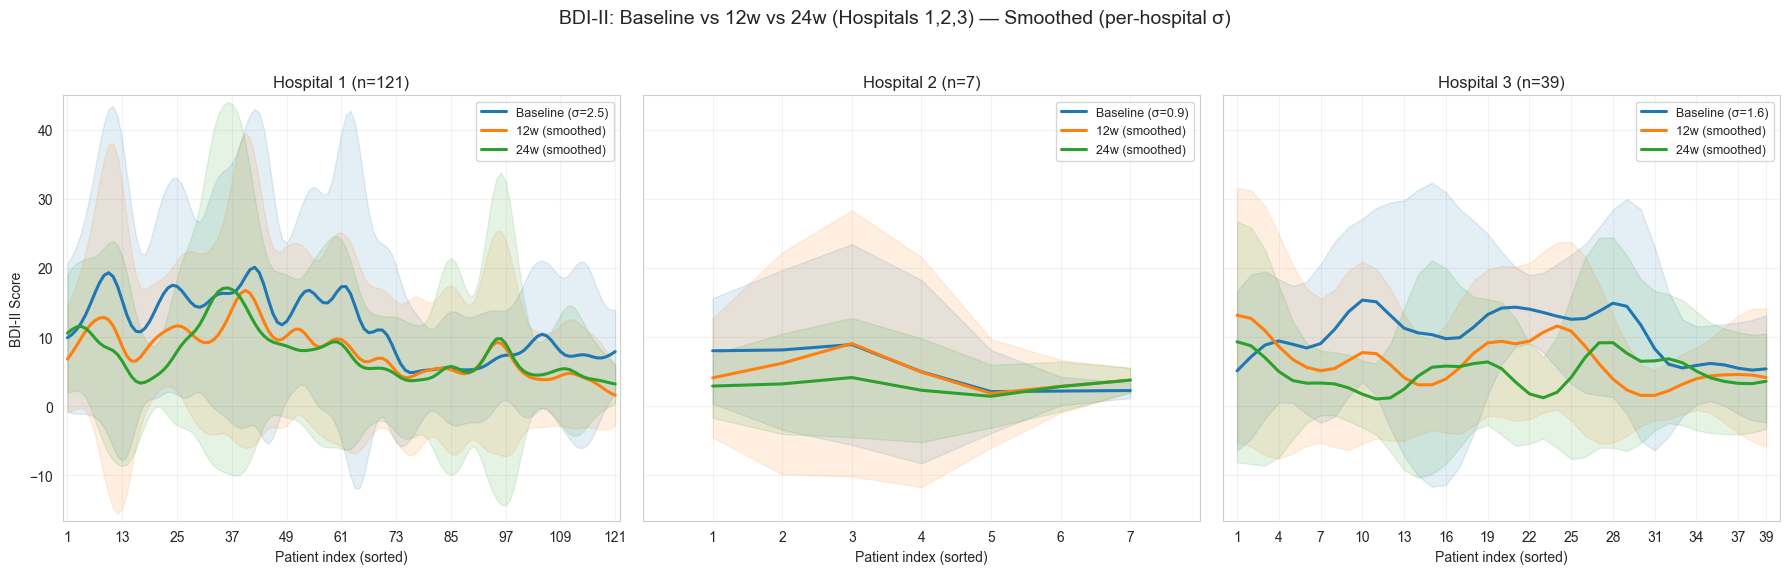

In [72]:
# prepare and plot smoothed curves for hospitals, robust to empty groups, NaN gaps and ordered by count
# re-uses kernel, colors, window from earlier cells

def _center_trim_or_pad(arr, target_len):
    arr = np.asarray(arr, dtype=float)
    m = len(arr)
    if m == target_len:
        return arr
    if m > target_len:
        start = (m - target_len) // 2
        return arr[start:start + target_len]
    out = np.full(target_len, np.nan, dtype=float)
    start = (target_len - m) // 2
    out[start:start + m] = arr
    return out

def gaussian_kernel(sigma, radius=None):
    sigma = float(sigma)
    if sigma <= 0:
        return np.array([1.0])
    if radius is None:
        radius = max(1, int(np.ceil(4.0 * sigma)))
    x = np.arange(-radius, radius + 1)
    k = np.exp(-0.5 * (x / sigma) ** 2)
    k = k.astype(float)
    k /= k.sum()
    return k

def safe_smooth_and_band(y, kernel, window):
    y = np.asarray(y, dtype=float).copy()
    n = len(y)
    if n == 0 or np.all(np.isnan(y)):
        return np.full(n, np.nan), np.full(n, np.nan), np.full(n, np.nan)
    try:
        s = pd.Series(y)
        # limit should not exceed length
        limit = int(max(1, min(window, n)))
        y_interp = s.interpolate(limit=limit, limit_direction='both').to_numpy()
    except Exception:
        y_interp = y.copy()

    mask = (~np.isnan(y_interp)).astype(float)
    y0 = np.nan_to_num(y_interp, 0.0)
    kernel = np.asarray(kernel, dtype=float)

    conv_y = np.convolve(y0, kernel, mode='same')
    conv_mask = np.convolve(mask, kernel, mode='same')

    conv_y = _center_trim_or_pad(conv_y, n)
    conv_mask = _center_trim_or_pad(conv_mask, n)

    with np.errstate(invalid='ignore', divide='ignore'):
        mean = conv_y / conv_mask
    mean[conv_mask == 0] = np.nan

    y2 = np.nan_to_num(y_interp ** 2, 0.0)
    conv_y2 = np.convolve(y2, kernel, mode='same')
    conv_y2 = _center_trim_or_pad(conv_y2, n)

    with np.errstate(invalid='ignore', divide='ignore'):
        var = conv_y2 / conv_mask - np.nan_to_num(mean) ** 2
    var = np.where(np.isnan(var) | (var < 0), 0.0, var)
    std = np.sqrt(var)

    lb = mean - 1.96 * std
    ub = mean + 1.96 * std
    lb[conv_mask == 0] = np.nan
    ub[conv_mask == 0] = np.nan

    return mean, lb, ub

# choose per-hospital sigma values (tune as needed)
sigma_map = {
    1: 2.5,   # original / stronger smoothing for big hospital
    2: 0.9,   # much smaller sigma so small hospitals don't become straight lines
    3: 1.6    # medium smoothing
}
# if a default sigma variable exists, keep it as fallback
default_sigma = float(globals().get('sigma', 2.5))

# ensure we plot in hospital order 1,2,3 (but only those present in train_df)
desired_order = [1, 2, 3]
available = set(train_df['hospital_center_id'].unique())
hospital_sequence = [h for h in desired_order if h in available]

results = {}
processed = []

for hid in hospital_sequence:
    df_h = train_df[train_df['hospital_center_id'] == hid].copy().reset_index(drop=True)
    if df_h.empty:
        print(f"Skipping hospital {hid}: no rows in train_df")
        continue

    if 'patient_id' not in df_h.columns:
        df_h['patient_id'] = np.arange(1, len(df_h) + 1)
    df_h = df_h.sort_values('patient_id').reset_index(drop=True)

    yb = df_h['bdi_ii_baseline'].astype(float).to_numpy()
    y12 = df_h['bdi_ii_after_intervention_12w'].astype(float).to_numpy()
    y24 = df_h['bdi_ii_follow_up_24w'].astype(float).to_numpy()

    if (len(yb) == 0 and len(y12) == 0 and len(y24) == 0) or (np.all(np.isnan(yb)) and np.all(np.isnan(y12)) and np.all(np.isnan(y24))):
        print(f"Skipping hospital {hid}: all target arrays empty or NaN")
        continue

    sigma_h = sigma_map.get(hid, default_sigma)
    kernel_h = gaussian_kernel(sigma_h)
    interp_window = int(max(1, min(window, len(df_h))))

    try:
        yb_s, lb, ub = safe_smooth_and_band(yb, kernel_h, interp_window)
        y12_s, l12, u12 = safe_smooth_and_band(y12, kernel_h, interp_window)
        y24_s, l24, u24 = safe_smooth_and_band(y24, kernel_h, interp_window)
    except Exception as e:
        print(f"Skipping hospital {hid} due to smoothing error: {e}")
        continue

    x = np.arange(1, len(df_h) + 1)

    def ensure_len(a, L):
        a = np.asarray(a, dtype=float)
        if len(a) != L:
            return _center_trim_or_pad(a, L)
        return a

    results[hid] = {
        'df': df_h,
        'x': x,
        'yb_s': ensure_len(yb_s, len(x)), 'lb': ensure_len(lb, len(x)), 'ub': ensure_len(ub, len(x)),
        'y12_s': ensure_len(y12_s, len(x)), 'l12': ensure_len(l12, len(x)), 'u12': ensure_len(u12, len(x)),
        'y24_s': ensure_len(y24_s, len(x)), 'l24': ensure_len(l24, len(x)), 'u24': ensure_len(u24, len(x)),
        'sigma': sigma_h
    }
    processed.append(hid)

if len(processed) == 0:
    print("No hospitals to plot after processing.")
else:
    ymins, ymaxs = [], []
    for r in results.values():
        for arr_name in ('lb','l12','l24'):
            a = r.get(arr_name)
            if a is not None and np.any(~np.isnan(a)):
                ymins.append(np.nanmin(a))
        for arr_name in ('ub','u12','u24'):
            a = r.get(arr_name)
            if a is not None and np.any(~np.isnan(a)):
                ymaxs.append(np.nanmax(a))
    ymin = np.nanmin(ymins) if ymins else 0.0
    ymax = np.nanmax(ymaxs) if ymaxs else 1.0

    n = len(processed)
    fig, axes = plt.subplots(1, n, figsize=(6 * n, 6), sharey=True)
    if n == 1:
        axes = np.array([axes])

    for ax, hid in zip(axes, processed):
        r = results[hid]
        x = r['x']

        ax.plot(x, r['yb_s'], color=colors[0], label=f'Baseline (σ={r["sigma"]})', linewidth=2.2)
        ax.fill_between(x, r['lb'], r['ub'], color=colors[0], alpha=0.12)

        ax.plot(x, r['y12_s'], color=colors[1], label='12w (smoothed)', linewidth=2.2)
        ax.fill_between(x, r['l12'], r['u12'], color=colors[1], alpha=0.12)

        col24 = colors[2] if len(colors) > 2 else colors[1]
        ax.plot(x, r['y24_s'], color=col24, label='24w (smoothed)', linewidth=2.2)
        ax.fill_between(x, r['l24'], r['u24'], color=col24, alpha=0.12)

        ax.set_title(f'Hospital {hid} (n={len(r["df"])})')
        ax.set_xlabel('Patient index (sorted)')
        if ax is axes[0]:
            ax.set_ylabel('BDI-II Score')

        if len(x) > 1:
            step = max(1, int(len(x) / 10))
            xticks = list(range(1, int(x.max()) + 1, step))
            if int(x.max()) not in xticks:
                xticks.append(int(x.max()))
            ax.set_xticks(xticks)
            ax.set_xticklabels(xticks, rotation=0)

        ax.set_xlim(0, int(x.max()) + 1)
        ax.set_ylim(ymin - 1.0, ymax + 1.0)
        ax.grid(alpha=0.25)
        ax.legend(fontsize=9)

    plt.suptitle('BDI-II: Baseline vs 12w vs 24w (Hospitals 1,2,3) — Smoothed (per-hospital σ)', fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [73]:
train_df.columns

Index(['age', 'sex', 'hospital_center_id', 'condition', 'condition_type',
       'bdi_ii_baseline', 'bdi_ii_after_intervention_12w',
       'bdi_ii_follow_up_24w', 'mindfulness_therapies_started',
       'mindfulness_therapies_completed'],
      dtype='object')

### Condition and Condition Type Analysis

We can see that the distribution of the conditions such as Cancer, Acute Coronary Syndrome, Renal Insufficiency and Lower-limb Amputation has relevant splits majoring the data in the train split with 85%, 75%, 52% and 83% of the data is in the train split. 

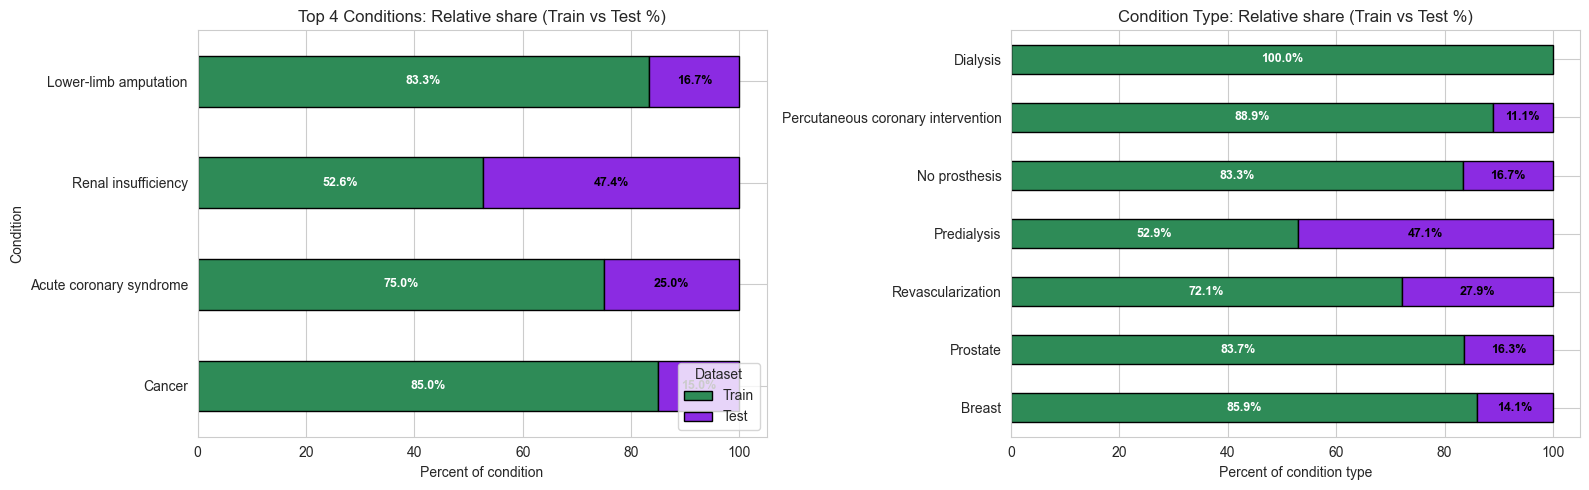

In [93]:
# Horizontal stacked bar of percent share (Train vs Test) for top conditions

N = 10
# New palette (green and purple) to replace previous blue/orange
palette = ['#2E8B57', '#8B2BE2']  # Train, Test

# Combine datasets and label them
combined = pd.concat([
    train_df.assign(_dataset='Train'),
    test_df.assign(_dataset='Test')
], ignore_index=True)

# Prepare data for conditions (left plot)
counts_cond = combined.groupby(['condition', '_dataset']).size().unstack(fill_value=0)

# Prepare data for condition_type (right plot) using the full df as "Total" vs train/test
# We'll show Train vs Test split for condition_type (consistent with left plot)
counts_ct = combined.groupby(['condition_type', '_dataset']).size().unstack(fill_value=0)

# Create side-by-side subplots
fig, (axL, axR) = plt.subplots(1, 2, figsize=(16, max(5, 0.5 * max(len(counts_cond), len(counts_ct)))))

# --- Left: Top conditions ---
if counts_cond.empty:
    axL.text(0.5, 0.5, 'No condition data found to plot.', ha='center', va='center')
    axL.set_axis_off()
else:
    top_conditions = counts_cond.sum(axis=1).sort_values(ascending=False).head(N).index
    subset = counts_cond.loc[top_conditions]
    subset_perc = subset.div(subset.sum(axis=1), axis=0) * 100
    subset_perc = subset_perc.reindex(columns=['Train', 'Test'], fill_value=0)

    subset_perc.plot(kind='barh', stacked=True, ax=axL, color=palette, edgecolor='k')
    axL.set_title(f'Top {len(subset_perc)} Conditions: Relative share (Train vs Test %)')
    axL.set_xlabel('Percent of condition')
    axL.set_ylabel('Condition')
    axL.legend(title='Dataset', loc='lower right')

    # Annotate percent inside bars when there's space
    for i, (idx, row) in enumerate(subset_perc.iterrows()):
        left = 0.0
        for j, col in enumerate(subset_perc.columns):
            val = float(row[col])
            if val > 2:  # annotate only when there is space
                axL.text(left + val / 2, i, f'{val:.1f}%', ha='center', va='center',
                         color='white' if j == 0 else 'black', fontsize=9, fontweight='semibold')
            left += val

# --- Right: Condition Type ---
if counts_ct.empty:
    axR.text(0.5, 0.5, 'No condition_type data found to plot.', ha='center', va='center')
    axR.set_axis_off()
else:
    # Use all condition_type entries sorted by total occurrences
    top_ct = counts_ct.sum(axis=1).sort_values(ascending=False).index
    subset_ct = counts_ct.loc[top_ct]
    subset_ct_perc = subset_ct.div(subset_ct.sum(axis=1), axis=0) * 100
    subset_ct_perc = subset_ct_perc.reindex(columns=['Train', 'Test'], fill_value=0)

    subset_ct_perc.plot(kind='barh', stacked=True, ax=axR, color=palette, edgecolor='k')
    axR.set_title('Condition Type: Relative share (Train vs Test %)')
    axR.set_xlabel('Percent of condition type')
    axR.set_ylabel('')
    axR.legend_.remove()  # remove duplicate legend (keep left one)

    # Annotate percent inside bars when there's space
    for i, (idx, row) in enumerate(subset_ct_perc.iterrows()):
        left = 0.0
        for j, col in enumerate(subset_ct_perc.columns):
            val = float(row[col])
            if val > 2:
                axR.text(left + val / 2, i, f'{val:.1f}%', ha='center', va='center',
                        color='white' if j == 0 else 'black', fontsize=9, fontweight='semibold')
            left += val

plt.tight_layout()
plt.show()

In [84]:
df['condition_type'].value_counts()

condition_type
Breast                                78
Prostate                              49
Revascularization                     43
Predialysis                           17
No prosthesis                         12
Percutaneous coronary intervention     9
Dialysis                               1
Name: count, dtype: int64

In [87]:
train_df['condition_type'].value_counts()

condition_type
Breast                                67
Prostate                              41
Revascularization                     31
No prosthesis                         10
Predialysis                            9
Percutaneous coronary intervention     8
Dialysis                               1
Name: count, dtype: int64

In [88]:
test_df['condition_type'].value_counts()

condition_type
Revascularization                     12
Breast                                11
Prostate                               8
Predialysis                            8
No prosthesis                          2
Percutaneous coronary intervention     1
Name: count, dtype: int64